# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../../data/datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")

In [6]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [8]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [9]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [11]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [24]:
featured_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", 
                 "City_Tier 1", "City_Tier 2", "City_Tier 3", "Record"]

In [25]:
X = df_new[featured_cols]
Y = df_new["Total Spend"]

In [26]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030136998
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [28]:
list(zip(featured_cols, lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.15494612549589526),
 ('Gender_Female', -131.02501325554596),
 ('Gender_Male', 131.025013255546),
 ('City_Tier 1', 76.76432601049537),
 ('City_Tier 2', 55.138974309232324),
 ('City_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445642)]

In [29]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como:
* Total_Spend = -79.41713030136998 + Monthly Income * 0.14753898049205735 + Transaction Time * 0.15494612549589526 + 
    Gender_Female * -131.02501325554596 + Gender_Male * 131.025013255546 + City_Tier 1 * 76.76432601049537 +
    City_Tier 2 * 55.138974309232324 + City_Tier 3 * -131.90330031972775 + Record + 772.2334457445642

In [48]:
df_new["prediction"] = (-79.41713030136998) + df_new["Monthly Income"] * 0.14753898049205735 + df_new["Transaction Time"] * 0.15494612549589526 + df_new["Gender_Female"] * (-131.02501325554596) + df_new["Gender_Male"] * 131.025013255546 + df_new["City_Tier 1"] * 76.76432601049537 + df_new["City_Tier 2"] * 55.138974309232324 + df_new["City_Tier 3"] * (-131.90330031972775) + df_new["Record"] * 772.2334457445642

In [49]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [50]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [51]:
SSD

1517733985.3408167

In [52]:
RSE = np.sqrt(SSD/(len(df_new)-len(featured_cols)-1))
RSE

803.1318809818166

In [53]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [54]:
error = RSE / sales_mean
error

0.13031135680294162

### Otra forma más simple de calcular las predicciones:
#### Usando la función predict del modelo lineal y añadiendolo como columna adicional al data frame:
* df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

## Eliminar variables dummy redundantes

In [55]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [56]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [58]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [60]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
llm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
print(lm.intercept_)

-133.67781754642238


In [62]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.0500265110938),
 ('City_Tier 2', -21.62535170126275),
 ('City_Tier 3', -208.66762633022347),
 ('Record', 772.2334457445642)]

In [63]:
lm.score(X,Y)

0.9179923586131016

El modelo no cambia pero se aglutinan los datos

# Transformación de variables para conseguir una relación no lineal

In [64]:
import pandas as pd

In [65]:
data_auto = pd.read_csv("../../data/datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [67]:
data_auto.shape

(406, 9)

In [68]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

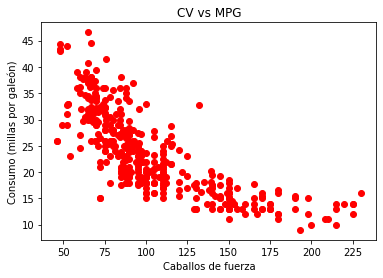

In [69]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de fuerza")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
* mpg = a + b * horsepower

In [77]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [78]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
type(X_data)

numpy.ndarray

In [80]:
type(X_data)

numpy.ndarray

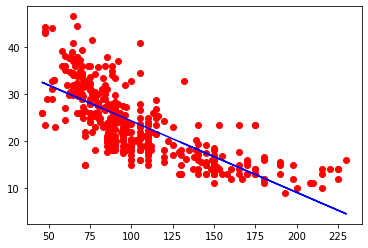

In [82]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [83]:
lm.score(X_data, Y)

0.574653340645025

In [85]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

### Modelo de regresión cuadrático
* mpg = a + b * horsepower^2

In [86]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [87]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lm.score(X_data, Y)

0.4849887034823205

In [89]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean
SSD, RSE, y_mean, error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

### Modelo de regresión lineal y cuadrático
* mpg = a + b horsepower + c horsepower^2

In [90]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [91]:
poly = PolynomialFeatures(degree=2)

In [92]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [93]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
lm.score(X_data,Y)

0.6439066584257469

In [95]:
lm.intercept_

55.02619244708123

In [96]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - 0.434 + 0.00112615 hp^2

In [107]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,Y)
    print("Regresión de grado "+str(d))
    print("R2:"+str(lm.score(X_data,Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
R2:0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654 y_mean: 23.51457286432162 error: 0.1963795466190689
Regresión de grado 3
R2:0.6444678885560742
58.448774111672364
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.569367428552, RSE: 4.614140736300908 y_mean: 23.51457286432162 error: 0.19622473106036675
Regresión de grado 4
R2:0.6467674189704503
40.09664386273736
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.79983249135, RSE: 4.599194731579757 y_mean: 23.51457286432162 error: 0.19558912501268774
Regresión de grado 5
R2:0.6547512491826557
-40.69399204497033
[ 0.00000000e+00  4.00021890e+00 -7.54802463e-02  6.19621638e-04
 -2.36220983e-06  3.41983064e-09]
SSD: 8373.171387671198, RSE: 4.546921733822689 y_mean: 23.51457286432162 error: 0.19336612066305822
Regresión de grado 6
R2:0.6572840900121032
-156.97245110245223
[ 0.0000

In [104]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE / y_mean
    print("SSD: " + str(SSD) + ", RSE: " + str(RSE) + " y_mean: " + str(y_mean) + " error: " + str(error))

# El problema de los outliers

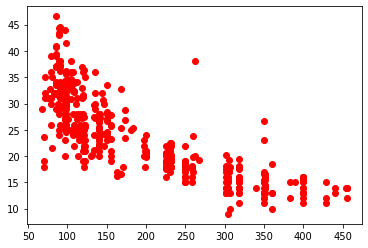

In [109]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [111]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
lm.score(X,Y)

0.6261049762826918

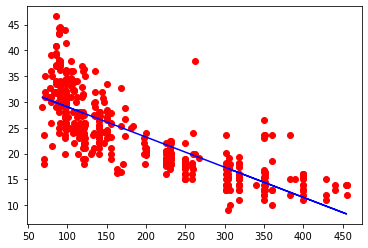

In [113]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")

In [125]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [126]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [131]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [133]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
lm.score(X,Y)

0.6466514317531822

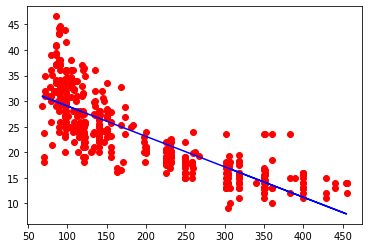

In [135]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X, lm.predict(X), color="blue")